In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib.pyplot as plt
plt.ion()
from cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# load shape space
with open(r'D:/Dropbox/CavityDesignHub/MuCol_Study/Cavities/cavity_data_mid_end_cells.json') as f:
    shape_space = json.load(f)
pp.pprint(shape_space)

{   'C3795_1300MHz': {   'BP': 'both',
                         'FREQ': 1300,
                         'IC': [   38.23,
                                   35.76,
                                   10.48,
                                   7.4,
                                   49.94,
                                   57.7,
                                   105.66,
                                   113.76249257990644],
                         'OC': [   38.23,
                                   35.76,
                                   10.48,
                                   7.4,
                                   49.94,
                                   57.7,
                                   105.66,
                                   113.76249257990644],
                         'OC_R': [   38.23,
                                     35.76,
                                     10.48,
                                     7.4,
                                     49.94,
        

<Axes: >

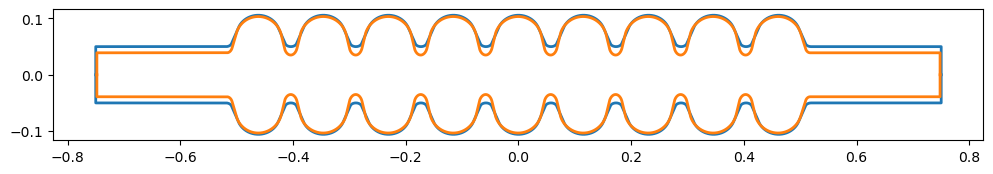

In [3]:
# define geometry parameters
# midcell = np.array([42, 42, 12, 19, 35, 57.7, 103.353])
# endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
# endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])

C3795_1300MHz = shape_space['C3795_1300MHz']
TESLA = shape_space['TESLA']

# create cavity
cav = Cavity(9, np.array(C3795_1300MHz['IC']), np.array(C3795_1300MHz['OC']), np.array(C3795_1300MHz['OC_R']), beampipe='both')
ax = cav.plot('geometry')

# create cavity
cav1 = Cavity(9, np.array(TESLA['IC']), np.array(TESLA['OC']), np.array(TESLA['OC_R']), beampipe='both')
# show cavity
cav1.plot('geometry', ax)

# Create cavities object

In [4]:
cavs = Cavities([])
# must first save cavities
cavs.save(files_path='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

('Project created successfully/already exists. You can proceed with analysis.',)


# Add cavity(ies)


In [5]:
cavs.add_cavity([cav, cav1], ['C3795_1300MHz', 'TESLA'])

# Tune cavities

In [6]:
cavs.run_tune('Req', freqs=1300, rerun=False)
pp.pprint(cavs.eigenmode_tune_res)

  0%|          | 0/2 [00:00<?, ?it/s]

{   'C3795_1300MHz': {   'L': 57.7,
                         'Req': 108.94352117946221,
                         'alpha_i': 111.23373752785915,
                         'alpha_o': 111.23373752785915,
                         'freq': 1300.0},
    'TESLA': {   'L': 57.6524,
                 'Req': 103.35414205663352,
                 'alpha_i': 103.1698581885549,
                 'alpha_o': 103.1698581885549,
                 'freq': 1300.0}}


# Run eigenmode analysis

In [7]:
cavs.run_eigenmode('ngsolve', rerun=False)
pp.pprint(cavs.eigenmode_qois)

  0%|          | 0/2 [00:00<?, ?it/s]

{   'C3795_1300MHz': {   'Bpk [mT]': 8.276355204329615e-05,
                         'Bpk/Eacc [mT/MV/m]': 7.2747011862063,
                         'Eacc [MV/m]': 1.1376900566063895e-05,
                         'Epk [MV/m]': 4.270822513903627e-05,
                         'Epk/Eacc []': 3.753942024107202,
                         'G [Ohm]': 281.28757420904304,
                         'GR/Q [Ohm^2]': 173038.49127247377,
                         'Hpk [A/m]': 0.06586114207766958,
                         'N Cells': 9,
                         'Normalization Length [mm]': 115.4,
                         'Q []': 30328.915731160254,
                         'R/Q [Ohm]': 615.1657845500051,
                         'Req [mm]': 108.94352117946221,
                         'Rsh [MOhm]': 18.657311240310186,
                         'Vacc [MV]': 1.181604892791396e-05,
                         'ff [%]': 1.2983794801174287,
                         'freq [MHz]': 1298.595368844168,
               

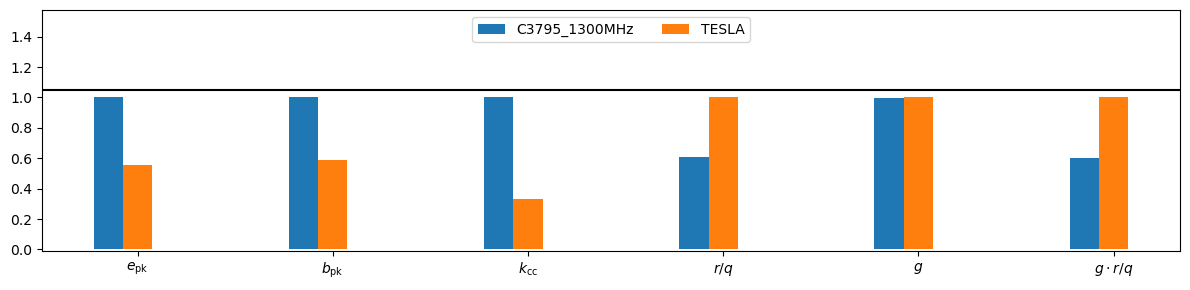

In [8]:
cavs.plot_compare_fm_bar()

# Run wakefield analysis

In [9]:
# cavs.run_wakefield(bunch_length=50)

# Run wakefield for operating points

In [10]:
op_points = OperationPoints()
op_points.get_default_operation_points()
pp.pprint(op_points.op_points['W_2023'])
cavs.run_wakefield(wp_dict={'Z_2023': op_points.op_points['Z_2023'], 'W_2023': op_points.op_points['W_2023']}, rerun=False)

{   'E [GeV]': 80,
    'Eacc [MV/m]': 10.61,
    'I0 [mA]': 135,
    'N_c []': 132,
    'Nb [1e11]': 2.29,
    'T [K]': 4.5,
    'V [GV]': 1.0,
    'alpha_p [1e-5]': 2.85,
    'beta_xy [m]': 50,
    'f_rev [kHz]': 3.07,
    'freq [MHz]': 400.79,
    'nu_s []': 0.0801,
    'sigma_BS [mm]': 7.02,
    'sigma_SR [mm]': 3.55,
    'tau_xy [ms]': 131.98,
    'tau_z [ms]': 65.99}


  0%|          | 0/2 [00:00<?, ?it/s]

ic| self.folder: WindowsPath('D:/Dropbox/CavityDesignHub/MuCol_Study/SimulationData/ConsoleTest/cavities')


At least it got here
At least it got here


ic| self.folder: WindowsPath('D:/Dropbox/CavityDesignHub/MuCol_Study/SimulationData/ConsoleTest/cavities')


At least it got here
At least it got here


In [11]:
pp.pprint(cavs.abci_qois)

{   'C3795_1300MHz': {   'W_2023_BS_7.02mm': {   'I0 [mA]': 135.0,
                                                 'Nb [1e11]': 2.29,
                                                 'P_HOM [kW]': 8.118014123654012,
                                                 'R/Q [Ohm]': 615.1657845500051,
                                                 'k_FM [V/pC]': 1.209852483713244,
                                                 'n cell': 9,
                                                 'sigma_z [mm]': 7.02,
                                                 '|k_kick| [V/pC/m]': 16.31,
                                                 '|k_loss| [V/pC]': 2.849},
                         'W_2023_SR_3.55mm': {   'I0 [mA]': 135.0,
                                                 'Nb [1e11]': 2.29,
                                                 'P_HOM [kW]': 12.529176605460064,
                                                 'R/Q [Ohm]': 615.1657845500051,
                                  

In [12]:
cavs.cavities_list[0].abci_data['Long'].data_dict.keys()

dict_keys(['Cavity Shape Input', 'Wake Potentials', 'Real Part of Longitudinal Impedance', 'Imaginary Part of Longitudinal Impedance', 'Frequency Spectrum of Loss Factor', 'Loss Factor Spectrum Integrated upto F', 'Longitudinal Impedance Magnitude'])

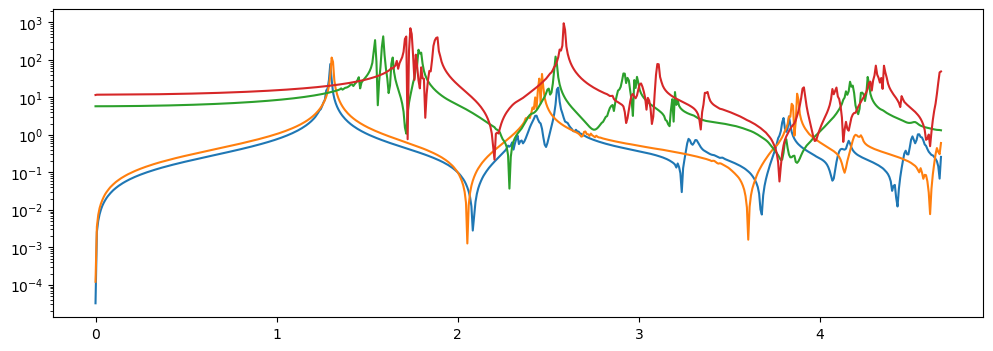

In [13]:
ax = cavs.plot('ZL')
cavs.plot('ZT', ax)
ax.set_yscale('log')

ic| results: [{'$P_\\mathrm{HOM}/cav \\mathrm{[kW]}$': 128.0978464248287,
               '$|k_\\parallel| \\mathrm{[V/pC]}$': 3.501,
               '$|k_\\perp| \\mathrm{[V/pC/m]}$': 13.24},
              {'$P_\\mathrm{HOM}/cav \\mathrm{[kW]}$': 198.5488539382584,
               '$|k_\\parallel| \\mathrm{[V/pC]}$': 5.548,
               '$|k_\\perp| \\mathrm{[V/pC/m]}$': 35.49}]


<class 'numpy.ndarray'> <class 'int'> <class 'float'> <class 'numpy.ndarray'> [[  3.501       13.24       128.09784642]
 [  5.548       35.49       198.54885394]]
<class 'numpy.ndarray'> <class 'int'> <class 'float'> <class 'numpy.ndarray'> [[  3.501       13.24       128.09784642]
 [  5.548       35.49       198.54885394]]


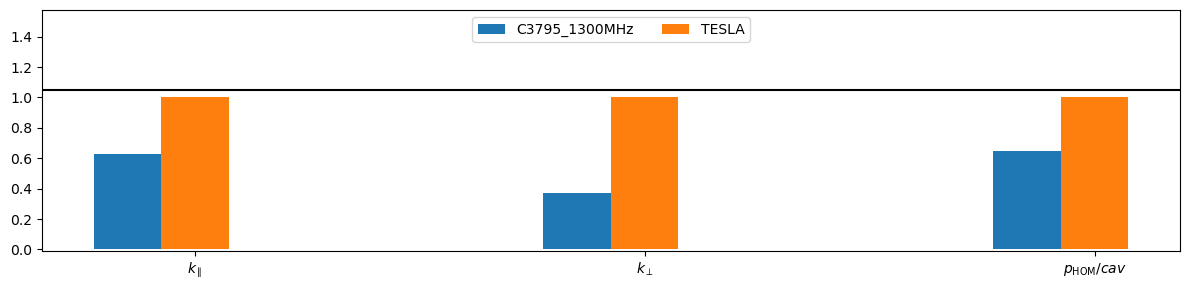

In [14]:
cavs.plot_compare_hom_bar('Z_2023_SR_4.32mm')

<Axes: >

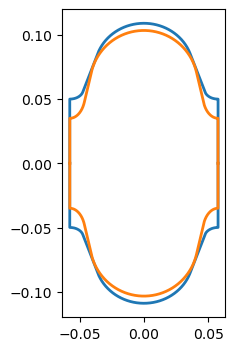

In [15]:
cavs.plot('geometry', mid_cell=0)